# Laboratorio di Simulazione Numerica

## Esercitazione 6

### Esercizio 6.1 

In quest'esercizio si vuole simulare il **modello di Ising 1-dimensionale**. Questo è uno dei pochi modelli in meccanica statistica che ha soluzione analitica, con la quale sarà quindi possibile confrontare i risultati della nostra simulazione. Nell'esercizio in questione, si vuole applicare la simulazione ad una catena 1D di $N = 50$ spin interagenti l'uno con l'altro tramite interazione a coppia descritta dall'hamiltoniana:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $J$ è una costante di interazione fra spin, $h$ è il campo magnetico e tutti gli spin $\{ s_i \}_{i=1,N}$ prendono uno fra i due valori $ (-1, +1 ) $. Questa hamiltoniana rappresenta sia l'interazione fra gli spin vicini fra loro, sia quella fra uno spin ed un campo magnetico.

Di un tale sistema di vuole misurare l'**energia interna per spin $U(N,T) = \langle H \rangle$**, la **capacità termica $C(N,T)$**, la **suscettività magnetica $\chi(N,T)$**, ed infine la **magnetizzazione media $M(N,T,h)$** in presenza di un eventuale campo magnetico h.

Siamo interessati ad eseguire la simulazione **a temperatura $T$ costante**. Questa condizione corrisponde alla situazione fisica nella quale il sistema è a contatto con un **serbatoio** molto più grande con il quale è possibile scambiare energia sotto forma di calore. Dal momento che il serbatoio è molto più grande del sistema, i due sistemi a contatto raggiungeranno una condizione di equilibrio nella quale sono alla stessa temperatura, ossia la temperatura del serbatoio. Il sistema così ottenuto è detto **ensamble canonico**: in queste condizioni uno stato $\mu$ compare con probabilità data dalla distribuzione di Boltzmann:

$$
p(\mu) = \frac{e^{-\frac{E_{\mu}}{k_BT}}}{Z}
$$

dove $\frac{1}{k_B T} = \beta $, con $T$ data dalla temperatura del serbatoio.

Per campionarla, vogliamo utilizzare l'algoritmo di Metropolis. Questo proporrà una mossa, che nel caso del modello di Ising 1D sarà quella di **eseguire un flip su uno dei $50$ spin scelto a caso**, portando il sistema da uno stato $\mu$ ad uno stato $\nu$ ad energia $E_{\nu}$. In questo modo, la probabilità di accettazione del Metropolis sarà data da

$$
A(\nu|\mu) = min\big[1, e^{-\beta(E_{\nu} - E_{\mu})}\big]
$$

Ciò significa che se la mossa proposta porta il sistema ad un'energia più bassa $(E_{\nu} < E_{\mu})$ questa viene accettata con probabilità 1. In caso contrario $(E_{\nu} > E_{\mu})$, la mossa potrebbe comunque essere accettata con probabilità $ e^{-\beta(E_{\nu} - E_{\mu})}$.

Per eseguire la simulazione è stato fornito un codice "Ising_1D" il quale permetteva di calcolare l'energia media per spin $U(N, T)$ tramite campionamento con l'algoritmo di Metroplis. Lo scopo dell'esercizio era quindi quello di completare il codice aggiungendo il calcolo delle altre grandezze termodinamiche e implementando la possibilità di eseguire la simulazione tramite campionamento fatto con il Gibbs sampling. Questa seconda possibilità viene fornita tramite l'aggiunta di una variabile booleana "metro" all'interno del file di input "input.0".

I parametri utilizzati per la simulazione sono $J = 1.0$, $h = 0.0$ e $h = 0.02$, e le temperature simulate vanno da $0.5 K$ a $2.0 K$ in passi di $0.15 K$. Le unità utilizzate sono tali per cui $\mu_B=1$ and $k_B=1$. 

### Equilibrazione

Tutte le simulazioni iniziano da una condizione iniziale nella quale gli spin vengono inizializzati in modo randomico, cioè ogni spin assume casualmente il valore $+1$ o $-1$. Questa condizione rappresenta il caso in cui $T = \infty$. A partire da questa configurazione iniziale, avendo impostato dal file di input la temperatura $T$ alla quale si vuole eseguire la simulazione, è necessario equilibrare il sistema, ossia eseguire diversi step dell'algoritmo fino a quando le quantità calcolate dal codice non raggiungono una condizione stazionaria. Di seguito quindi riportiamo plot di energia interna a diverse temperature, per andare a verificare il numero di step necessari per equilibrare il sistema.

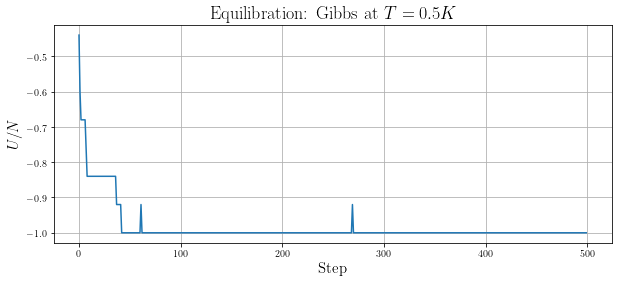

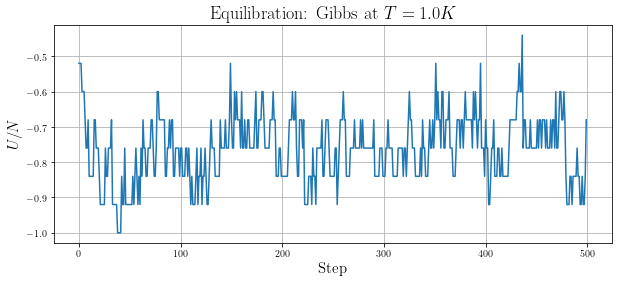

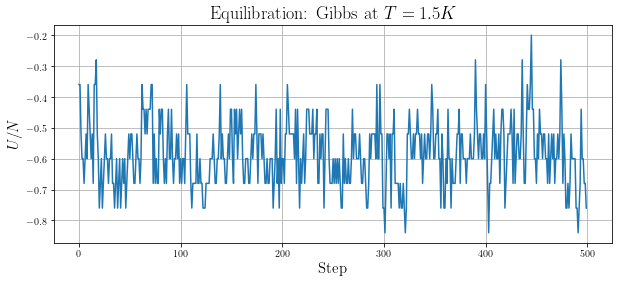

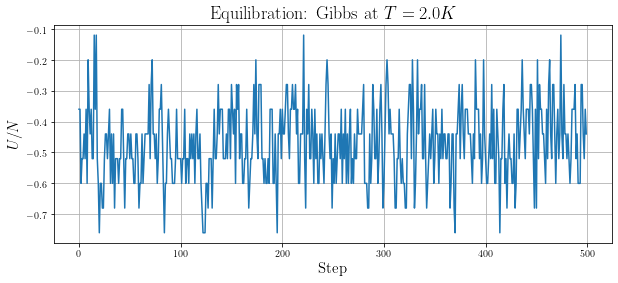

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

step = 500 #numero di blocchi
f = plt.figure(figsize=(10,4))
x = np.arange(step)
em5 = np.loadtxt("output._eq_05_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em5)
plt.title('Equilibration: Gibbs at $T = 0.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em10 = np.loadtxt("output._eq_10_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em10)
plt.title('Equilibration: Gibbs at $T = 1.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em15 = np.loadtxt("output._eq_15_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em15)
plt.title('Equilibration: Gibbs at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em20 = np.loadtxt("output._eq_20_gibbs.0", unpack='true', usecols=(1))
plt.plot(x, em20)
plt.title('Equilibration: Gibbs at $T = 2.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)
plt.show()

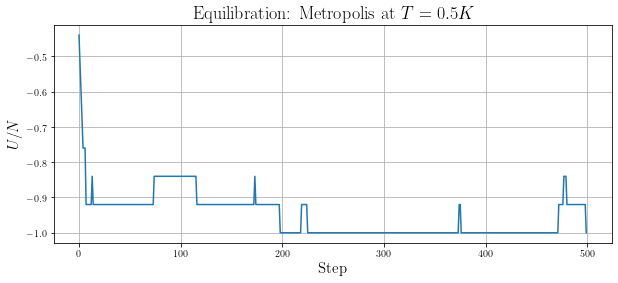

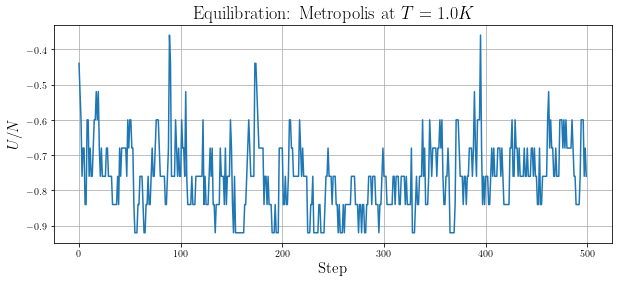

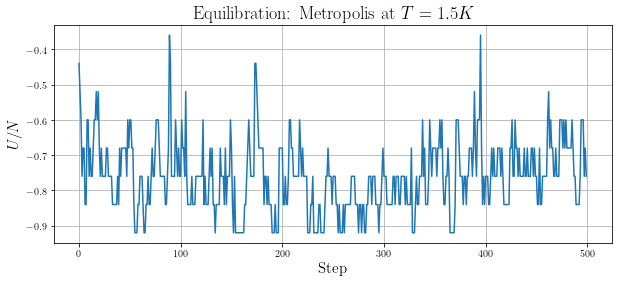

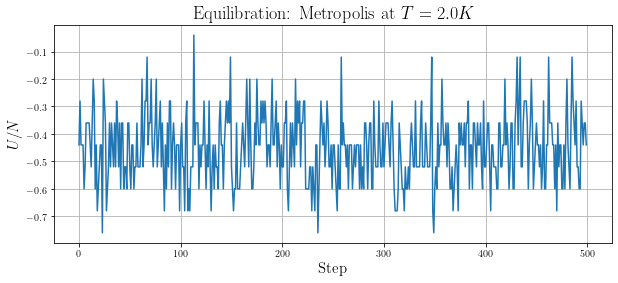

In [4]:
step = 500 #numero di blocchi
f = plt.figure(figsize=(10,4))
x = np.arange(step)
em5 = np.loadtxt("output._eq_05_metro.0", unpack='true', usecols=(1))
plt.plot(x, em5)
plt.title('Equilibration: Metropolis at $T = 0.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em10 = np.loadtxt("output._eq_10_metro.0", unpack='true', usecols=(1))
plt.plot(x, em10)
plt.title('Equilibration: Metropolis at $T = 1.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em15 = np.loadtxt("output._eq_15_metro.0", unpack='true', usecols=(1))
plt.plot(x, em15)
plt.title('Equilibration: Metropolis at $T = 1.5 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)

f = plt.figure(figsize=(10,4))
em20 = np.loadtxt("output._eq_20_metro.0", unpack='true', usecols=(1))
plt.plot(x, em20)
plt.title('Equilibration: Metropolis at $T = 2.0 K$', fontsize=18)
plt.ylabel('$U/N$', fontsize=15)
plt.xlabel('Step', fontsize=15)
plt.grid(True)
plt.show()

Da questi plot si vede come 500 step sono sufficienti per raggiungere una buona condizione di equilibrio, dalla quale si può iniziare la simulazione.

### Simulazione

La simulazione viene eseguita suddividendo l'intervallo di temperature $[0.5 K, 2.0 K]$ in 10 sotto-intervalli. Per ogni temperatura, viene eseguita una simulazione sia per il caso di campo magnetico "spento", sia per il caso in cui $h = 0.02$. I risultati vengono poi graficati per confrontarli con le soluzioni analitiche del modello di Ising. Il tutto è stato ripetuto due volte, per il campionamento con il Metropolis e con il Gibbs sampling. Ogni simulazione consiste di $10^5$ passi Monte Carlo suddivisi in 20 blocchi, necessari per il calcolo degli errori statistici tramite il data blocking.

I grafici presentati di seguito presentano i valori simulati per le quattro funzioni termodinamiche al variare della temperatura. Ad un confronto con i risultati della soluzione analitica, si ha una buona corrispondenza fra la simulazione e il modello teorico.

### Risultati della simulazione: Gibbs Sampling

In primis, per assicurarci che il sistema sia equilibrato, mostriamo un grafico degli andamenti delle medie di blocco. In condizione di equilibrio ci aspettiamo che le medie fra blocchi successivi non oscillino in modo elevato.

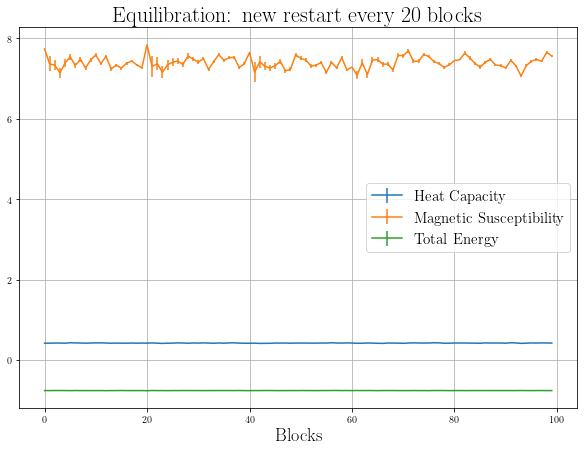

In [5]:
import math
from scipy.optimize import curve_fit

N = 100 #numero di blocchi

x2 = np.arange(N)
f = np.loadtxt("output.heat.0", unpack='true', usecols=(1))
errorf = np.loadtxt("output.heat.0", unpack='true', usecols=(3))
x = np.loadtxt("output.chi.0", unpack='true', usecols=(1))
errorx = np.loadtxt("output.chi.0", unpack='true', usecols=(3))
e = np.loadtxt("output.ene.0", unpack='true', usecols=(1))
errore = np.loadtxt("output.ene.0", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, f, yerr=errorf, label = 'Heat Capacity')
plt.errorbar(x2, x, yerr=errorx, label = 'Magnetic Susceptibility')
plt.errorbar(x2, e, yerr=errore, label = 'Total Energy')

plt.legend(loc='best', fontsize=15)

plt.xlabel('Blocks', fontsize=18)
plt.title('Equilibration: new restart every 20 blocks', fontsize=22)
plt.grid(True)

plt.show()

Le oscillazioni fra un blocco e il successivo sono contenute generalmente entro il 5%, anche per la suscettività magnetica, che raggiunge al massimo il 10% di oscillazione fra un blocco e l'altro.

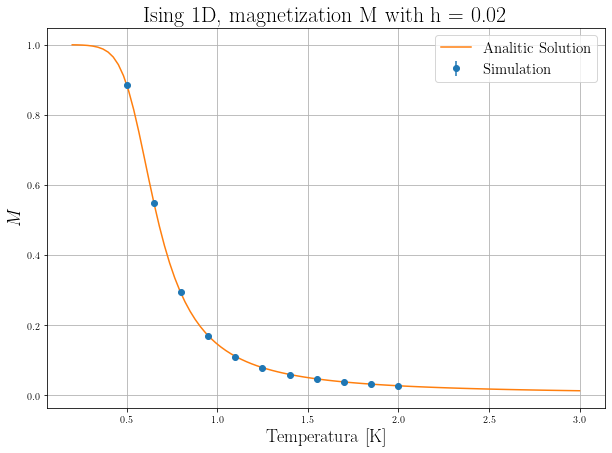

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x2 = np.loadtxt("mag.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("mag.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("mag.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, M, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize=22)

plt.grid(True)

plt.show();

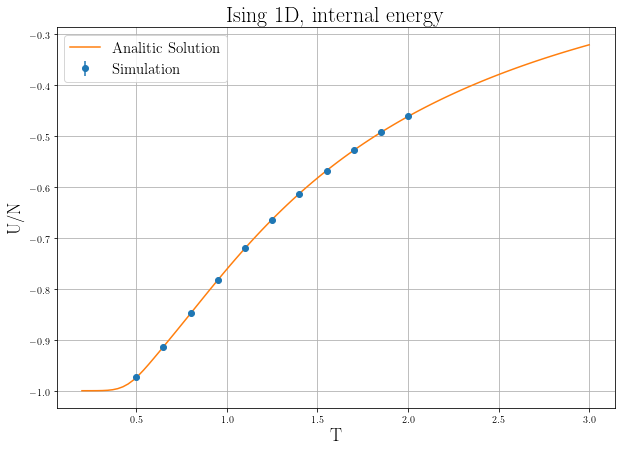

In [7]:
e = -J*( th + ch*thN )/( 1 + thN )

x2 = np.loadtxt("ene.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("ene.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("ene.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, e, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, internal energy', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('U/N', fontsize=18)

plt.grid(True)

plt.show()

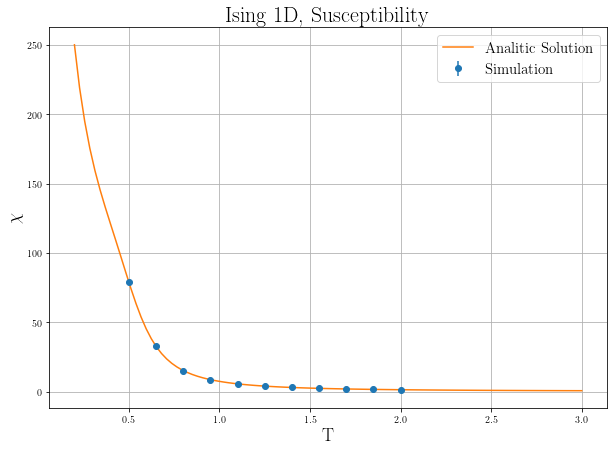

In [8]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

x2 = np.loadtxt("chi.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("chi.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("chi.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, X, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Susceptibility', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)
plt.grid(True)

plt.show()

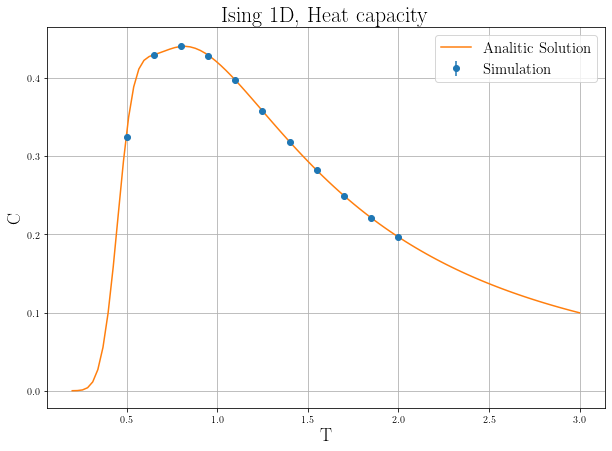

In [9]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x2 = np.loadtxt("heat.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("heat.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("heat.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, heat, label='Analitic Solution')
plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('C', fontsize=18)

plt.grid(True)

plt.show()

### Risultati della simulazione: Metropolis

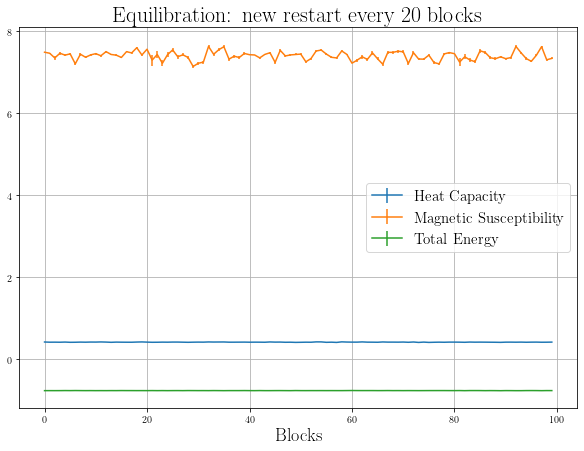

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

N = 100 #numero di blocchi

x2 = np.arange(N)
f = np.loadtxt("output.heat_metro.0", unpack='true', usecols=(1))
errorf = np.loadtxt("output.heat_metro.0", unpack='true', usecols=(3))
x = np.loadtxt("output.chi_metro.0", unpack='true', usecols=(1))
errorx = np.loadtxt("output.chi_metro.0", unpack='true', usecols=(3))
e = np.loadtxt("output.ene_metro.0", unpack='true', usecols=(1))
errore = np.loadtxt("output.ene_metro.0", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, f, yerr=errorf, label = 'Heat Capacity')
plt.errorbar(x2, x, yerr=errorx, label = 'Magnetic Susceptibility')
plt.errorbar(x2, e, yerr=errore, label = 'Total Energy')

plt.legend(loc='best', fontsize=15)
plt.xlabel('Blocks', fontsize=18)
plt.title('Equilibration: new restart every 20 blocks', fontsize=22)
plt.grid(True)

plt.show()

Anche nel caso della simulazione effettuata con algoritmo di Metropolis, ci assicuriamo che il sistema sia equilibrato mostrando l'andamento delle medie di blocco. Anche in questo caso si vede che le oscillazioni delle medie fra un blocco e il successivo sono molto contenute.

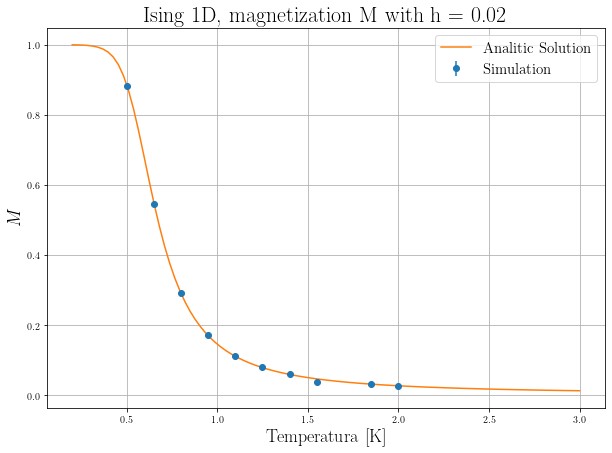

In [10]:
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x2 = np.loadtxt("mag_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("mag_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("mag_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, M, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.xlabel('Temperatura [K]', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Ising 1D, magnetization M with h = 0.02', fontsize=22)

plt.grid(True)

plt.show();

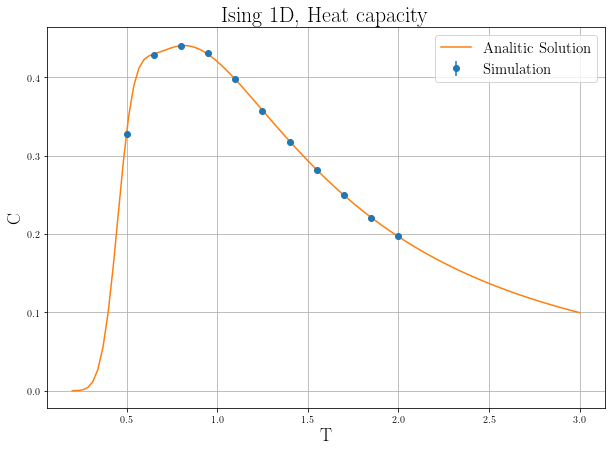

In [11]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

x2 = np.loadtxt("heat_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("heat_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("heat_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, heat, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Heat capacity', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('C', fontsize=18)

plt.grid(True)

plt.show()

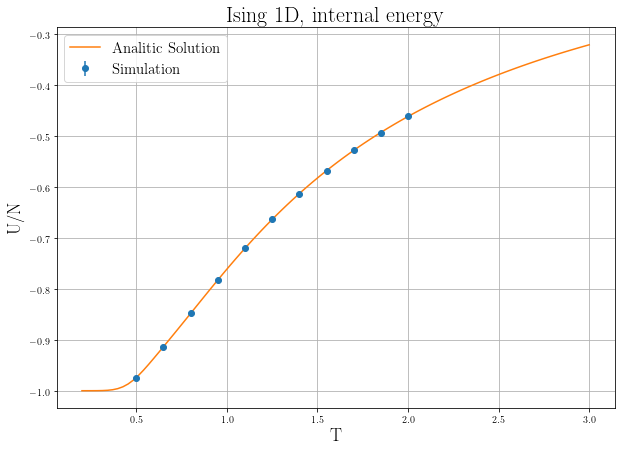

In [12]:
e = -J*( th + ch*thN )/( 1 + thN )

x2 = np.loadtxt("ene_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("ene_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("ene_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, e, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, internal energy', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('U/N', fontsize=18)

plt.grid(True)

plt.show()

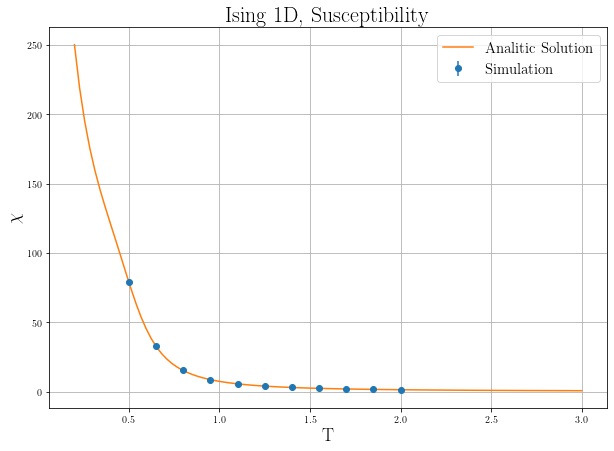

In [13]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

x2 = np.loadtxt("chi_metro.dat", unpack='true', usecols=(0)) 
z = np.loadtxt("chi_metro.dat", unpack='true', usecols=(2))
errorz = np.loadtxt("chi_metro.dat", unpack='true', usecols=(3))

plt.figure(figsize=(10,7))
plt.errorbar(x2, z, yerr=errorz, label='Simulation', fmt='o')
plt.plot(T, X, label='Analitic Solution')

plt.legend(loc='best', fontsize=15)
plt.title('Ising 1D, Susceptibility', fontsize=22)
plt.xlabel('T', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)

plt.grid(True)

plt.show()

### Digressione sul funzionamento del Gibbs Sampling

Il Gibbs sampling può essere visto come un caso particolare dell'algoritmo di Metropolis, nel quale la mossa proposta viene sempre accolta, cioè viene accettata con probabilità $1$.

Dopo aver inizializzato in modo randomico la catena di spin, questo tipo di campionamento prevede di selezionare in modo casuale uno fra i 50 spin e di assegnargli un nuovo valore ($s_k = \pm 1 \rightarrow s_k = \mp 1$) **a prescindere dal suo valore attuale**. Il nuovo valore viene assegnato con probabilità:

$$
p(s'_k|\{s_j : j \neq k \}) = \frac{1}{1 + \exp(\beta \Delta E_{s_k = \pm 1 \rightarrow s_k = \mp 1})}
$$

dove $\Delta E$ rappresenta la variazione di energia dovuta al flip eseguito sullo spin $s_k$. 

Dal momento che questa probabilità di transizione è della forma $$T(x|y) = \frac{p(x)}{p(x) + p(y)}$$ allora si dimostra che la accettazione dell'algoritmo di Metropolis è 

$$A(x|y) = min \big[ 1, \frac{\frac{p(y)}{p(x) + p(y)} p(x)}{\frac{p(x)}{p(x) + p(y)} p(y)} = min [1, 1] = 1 $$

e dunque la mossa viene sempre accettata.

Nel caso specifico, si seleziona uno spin $s_k$, si calcola l'energia della distribuzione nei due casi $s_k = +1$ e $s_k = -1$ e si fa la differenza $\Delta E$ fra le due configurazioni. A questo punto si calcola la $p(s'_k|\{s_j : j \neq k \})$ definita sopra e si genera un numero casuale $r$ fra $0$ e $1$.

- Se r < p : pongo $s_k = +1$
- Se r > p : pongo $s_k = -1$

